### Display Sample Images

Before diving into the convolutional neural network model, it's important to visualize the data we are working with. Below is a function named `display_sample_images` that takes in a directory and a list of categories. It randomly selects and displays a few images from each category to give us a sense of the different types of brain scans in our dataset.


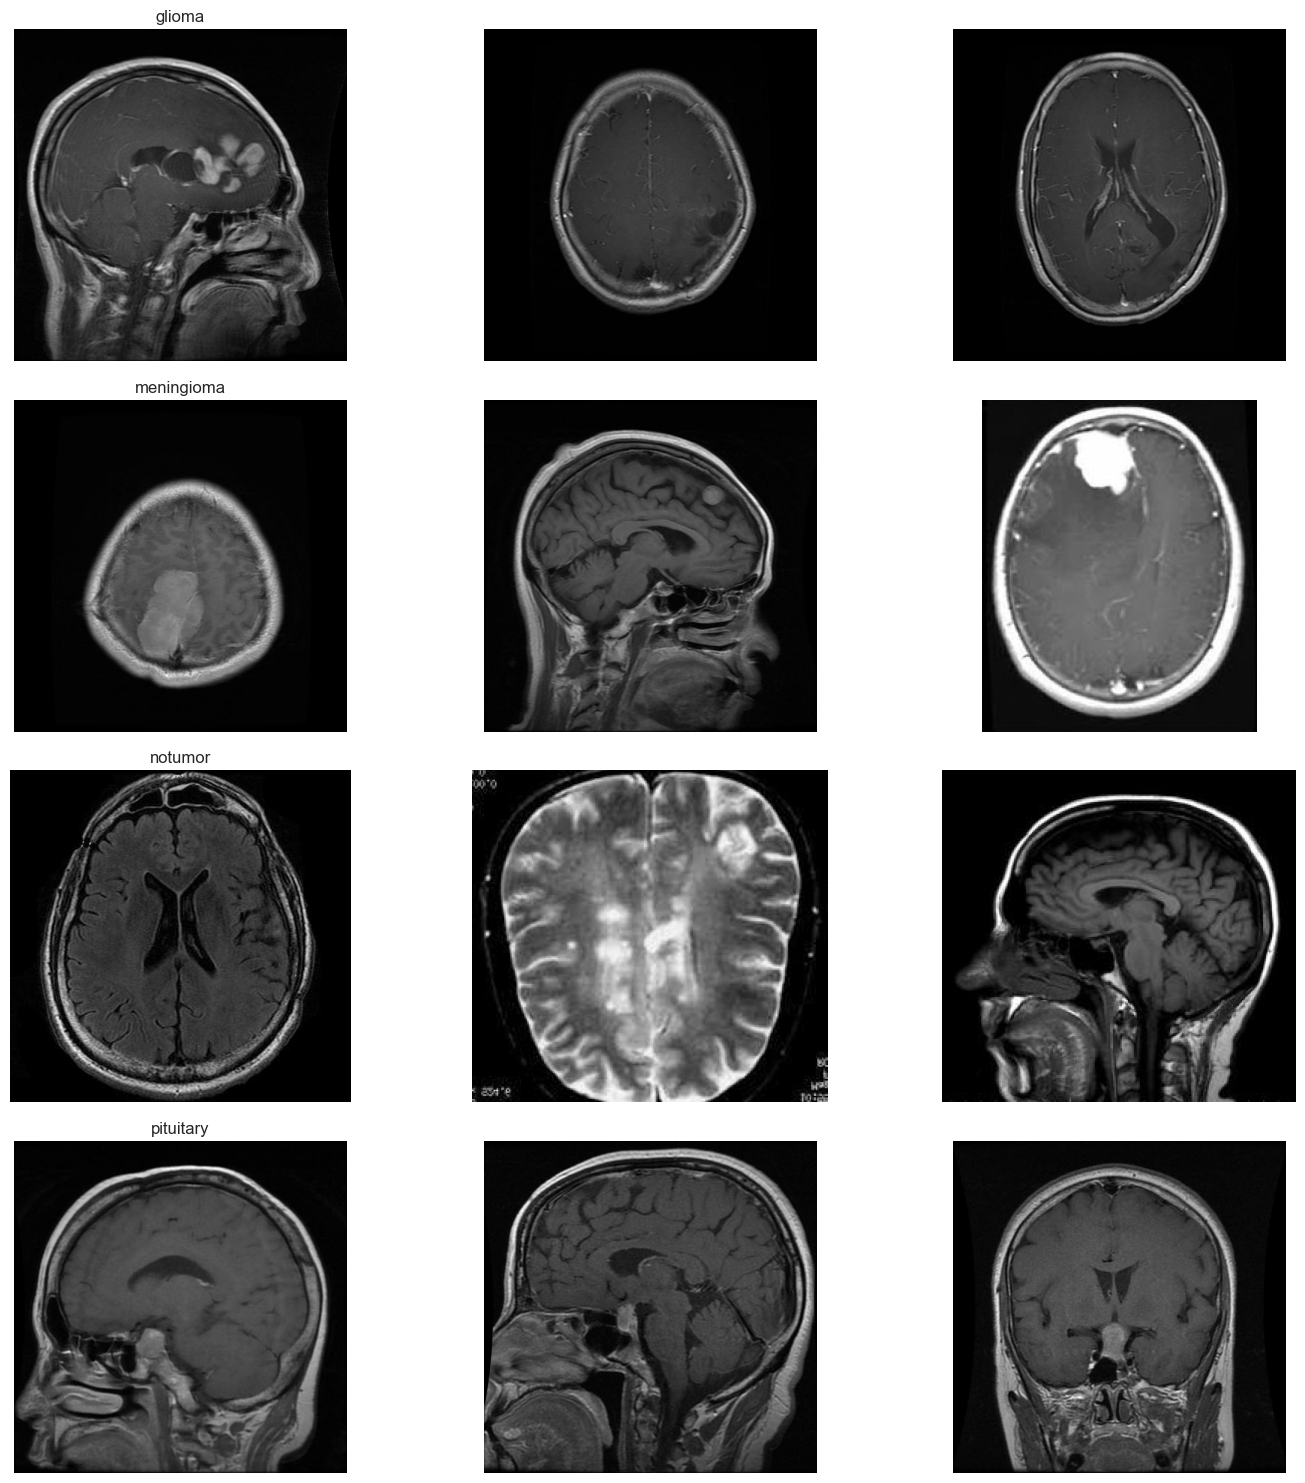

In [14]:
import matplotlib.pyplot as plt
import cv2
import random
import os

# Function to display sample images from each category
def display_sample_images(directory, categories, num_samples=3):
    """
    Displays sample images from each specified category.

    Parameters:
    directory (str): The directory path where categories are located.
    categories (list): A list of category names.
    num_samples (int): Number of samples to display from each category.
    """
    fig, axes = plt.subplots(len(categories), num_samples, figsize=(15, 15))
    for i, category in enumerate(categories):
        category_path = os.path.join(directory, category)
        image_files = os.listdir(category_path)
        random_samples = random.sample(image_files, num_samples)
        for j, sample in enumerate(random_samples):
            image_path = os.path.join(category_path, sample)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            axes[i, j].imshow(image, cmap='gray')
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(category)
    plt.tight_layout()
    plt.show()

training_dir = 'Training'
training_contents = ['glioma', 'meningioma', 'notumor', 'pituitary']
# Display sample images from the Training directory
display_sample_images(training_dir, training_contents)


In [15]:
import numpy as np

# Function to preprocess images
def preprocess_images(directory, categories, img_size=(128, 128)):
    """
    Preprocesses images by converting to grayscale, resizing, normalizing, and blurring.

    Parameters:
    directory (str): The directory path where categories are located.
    categories (list): A list of category names.
    img_size (tuple): The desired size of the output images.

    Returns:
    np.array: An array of preprocessed images.
    np.array: An array of labels corresponding to the images.
    """
    preprocessed_images = []
    labels = []
    for i, category in enumerate(categories):
        category_path = os.path.join(directory, category)
        image_files = os.listdir(category_path)
        for image_file in image_files:
            image_path = os.path.join(category_path, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            resized_image = cv2.resize(image, img_size)
            normalized_image = resized_image / 255.0
            blurred_image = cv2.GaussianBlur(normalized_image, (5, 5), 0)
            preprocessed_images.append(blurred_image)
            labels.append(i)
    return np.array(preprocessed_images), np.array(labels)

# Preprocess the training images
img_size = (128, 128)
preprocessed_images, labels = preprocess_images(training_dir, training_contents, img_size)

# Confirm the shape of the preprocessed images and labels arrays
preprocessed_images.shape, labels.shape


((5712, 128, 128), (5712,))

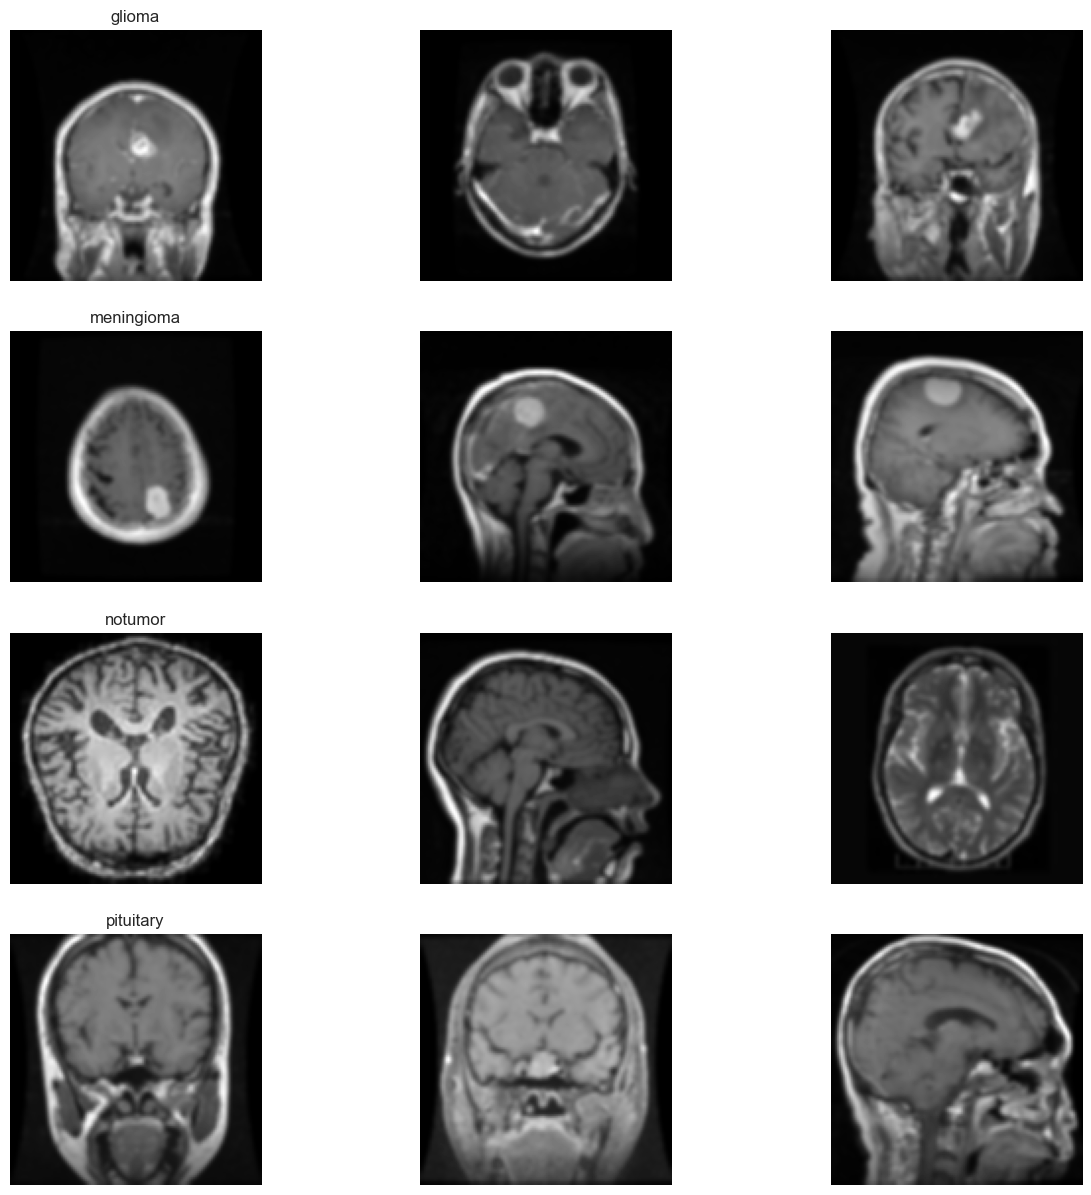

In [16]:
# Function to display sample preprocessed images from each category
def display_preprocessed_samples(images, labels, categories, num_samples=3):
    fig, axes = plt.subplots(len(categories), num_samples, figsize=(15, 15))
    for i, category in enumerate(categories):
        idxs = np.where(labels == i)[0]
        random_samples = np.random.choice(idxs, num_samples, replace=False)
        for j, sample in enumerate(random_samples):
            image = images[sample]
            axes[i, j].imshow(image, cmap='gray')
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(category)
    plt.show()

# Display sample preprocessed images from the Training directory
display_preprocessed_samples(preprocessed_images, labels, training_contents)


In [17]:
# Flatten the preprocessed images
flattened_images = preprocessed_images.reshape(preprocessed_images.shape[0], -1)

# Confirm the shape of the flattened images array
flattened_images.shape


(5712, 16384)

In [18]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(flattened_images, labels, test_size=0.2, random_state=42)

# Confirm the shape of the training and validation sets
X_train.shape, X_val.shape, y_train.shape, y_val.shape


((4569, 16384), (1143, 16384), (4569,), (1143,))

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the k-NN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

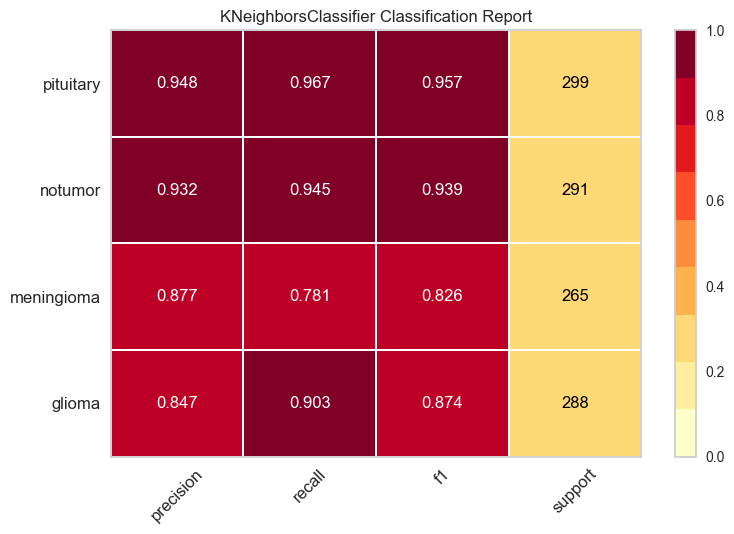

<Axes: title={'center': 'KNeighborsClassifier Classification Report'}>

In [20]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(knn, classes=training_contents, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_val, y_val)        # Evaluate the model on the test data
visualizer.show()     

In [21]:
# Preprocess the test images
test_dir = 'Testing'
training_contents = ['glioma', 'meningioma', 'notumor', 'pituitary']

preprocessed_test_images, test_labels = preprocess_images(test_dir, training_contents, img_size)



# Confirm the shape of the preprocessed test images and labels arrays

preprocessed_test_images.shape, test_labels.shape

((1311, 128, 128), (1311,))

In [22]:
# Flatten the preprocessed test images
flattened_test_images = preprocessed_test_images.reshape(preprocessed_test_images.shape[0], -1)

# Confirm the shape of the flattened test images array
flattened_test_images.shape


(1311, 16384)

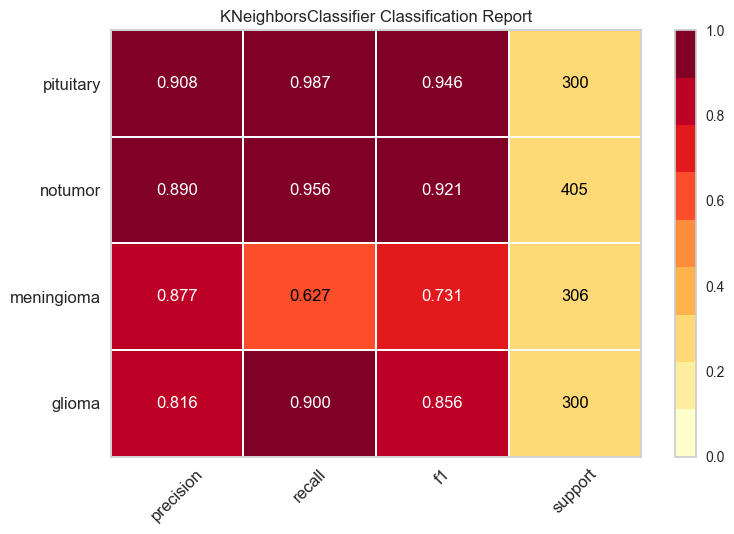

<Axes: title={'center': 'KNeighborsClassifier Classification Report'}>

In [23]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(knn, classes=training_contents, support=True)

visualizer.fit(flattened_images, labels)        # Fit the visualizer and the model
visualizer.score(flattened_test_images, test_labels)        # Evaluate the model on the test data
visualizer.show()

### Display Sample Images

Before diving into the convolutional neural network model, it's important to visualize the data we are working with. Below is a function named `display_sample_images` that takes in a directory and a list of categories. It randomly selects and displays a few images from each category to give us a sense of the different types of brain scans in our dataset.


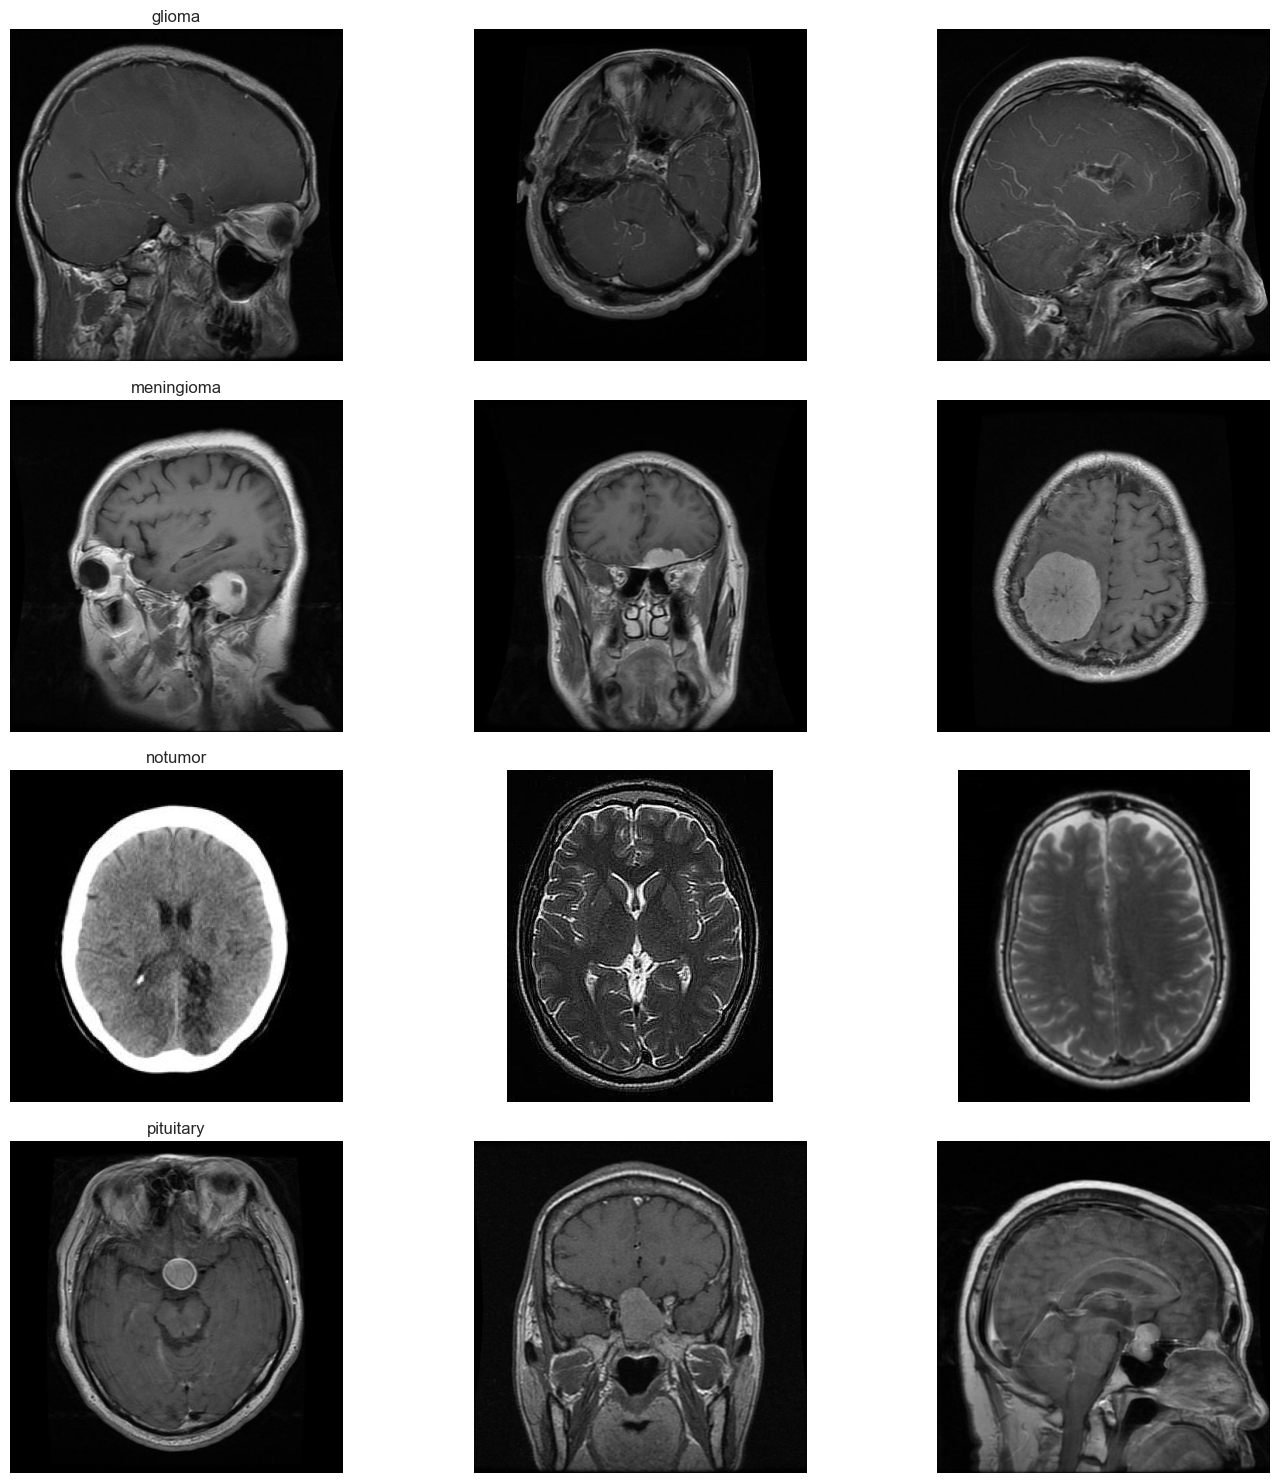

In [24]:
import matplotlib.pyplot as plt
import cv2
import random
import os

# Function to display sample images from each category
def display_sample_images(directory, categories, num_samples=3):
    """
    Displays sample images from each specified category.

    Parameters:
    directory (str): The directory path where categories are located.
    categories (list): A list of category names.
    num_samples (int): Number of samples to display from each category.
    """
    fig, axes = plt.subplots(len(categories), num_samples, figsize=(15, 15))
    for i, category in enumerate(categories):
        category_path = os.path.join(directory, category)
        image_files = os.listdir(category_path)
        random_samples = random.sample(image_files, num_samples)
        for j, sample in enumerate(random_samples):
            image_path = os.path.join(category_path, sample)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            axes[i, j].imshow(image, cmap='gray')
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(category)
    plt.tight_layout()
    plt.show()

training_dir = 'Training'
training_contents = ['glioma', 'meningioma', 'notumor', 'pituitary']
# Display sample images from the Training directory
display_sample_images(training_dir, training_contents)


### Image Preprocessing

The quality and format of the input data are crucial for the performance of a neural network. In this section, we preprocess the images to ensure that our model receives data that is in a suitable form for optimal performance. This includes converting images to grayscale, resizing them to a uniform shape, normalizing pixel values, and applying a Gaussian blur to reduce noise. The `preprocess_images` function encapsulates all these steps and prepares our images for the model.


In [25]:
import numpy as np

# Function to preprocess images
def preprocess_images(directory, categories, img_size=(128, 128)):
    """
    Preprocesses images by converting to grayscale, resizing, normalizing, and blurring.

    Parameters:
    directory (str): The directory path where categories are located.
    categories (list): A list of category names.
    img_size (tuple): The desired size of the output images.

    Returns:
    np.array: An array of preprocessed images.
    np.array: An array of labels corresponding to the images.
    """
    preprocessed_images = []
    labels = []
    for i, category in enumerate(categories):
        category_path = os.path.join(directory, category)
        image_files = os.listdir(category_path)
        for image_file in image_files:
            image_path = os.path.join(category_path, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            resized_image = cv2.resize(image, img_size)
            normalized_image = resized_image / 255.0
            blurred_image = cv2.GaussianBlur(normalized_image, (5, 5), 0)
            preprocessed_images.append(blurred_image)
            labels.append(i)
    return np.array(preprocessed_images), np.array(labels)

# Preprocess the training images
img_size = (128, 128)
preprocessed_images, labels = preprocess_images(training_dir, training_contents, img_size)

# Confirm the shape of the preprocessed images and labels arrays
preprocessed_images.shape, labels.shape


((5712, 128, 128), (5712,))

### Model Architecture

For our brain tumor classification task, we will design a Convolutional Neural Network (CNN) that is capable of extracting features from our preprocessed images and classifying them into the respective categories. A CNN is particularly well-suited for image recognition tasks due to its ability to capture spatial hierarchies in the data.

Below is the setup for our CNN architecture. It consists of convolutional layers, max pooling layers, and fully connected layers. Each convolutional layer will use ReLU activation functions to introduce non-linearity, and the model will output the probability distribution over the possible classes using a softmax activation function in the last layer.


In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model architecture
def build_model(input_shape):
    """
    Builds a CNN model according to the specified input shape.

    Parameters:
    input_shape (tuple): The shape of the input images.

    Returns:
    model (tf.keras.Model): The constructed CNN model.
    """
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(4, activation='softmax')  # assuming 4 categories of brain scans
    ])
    
    return model

# Assuming the images are 128x128 pixels and 1 channel for grayscale
model = build_model((128, 128, 1))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 128)      

### Model Training

With our model architecture defined, we now move to the training phase. We'll use the preprocessed images as our training data and split them into training and validation sets to monitor the model's performance on unseen data.

The training process involves adjusting the weights of the network to minimize the loss function, which measures the difference between the predicted and actual labels. Over time, the model should improve its accuracy on both the training and validation datasets.


In [27]:
from sklearn.model_selection import train_test_split

# Prepare the data for training
preprocessed_images_expanded = np.expand_dims(preprocessed_images, axis=-1)  # expand dimensions for Keras
X_train, X_val, y_train, y_val = train_test_split(preprocessed_images_expanded, labels, test_size=0.2, random_state=42)

# Confirm the shape of the training and validation sets
X_train.shape, X_val.shape, y_train.shape, y_val.shape

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,  # Set the number of epochs as per your requirement
    batch_size=32
)


Epoch 1/10
143/143 [==============================] - 3s 18ms/step - loss: 0.9095 - accuracy: 0.6332 - val_loss: 0.5180 - val_accuracy: 0.8093
Epoch 2/10
143/143 [==============================] - 2s 15ms/step - loss: 0.5781 - accuracy: 0.7910 - val_loss: 0.6498 - val_accuracy: 0.7752
Epoch 3/10
143/143 [==============================] - 2s 14ms/step - loss: 0.5201 - accuracy: 0.8245 - val_loss: 0.4106 - val_accuracy: 0.8609
Epoch 4/10
143/143 [==============================] - 2s 14ms/step - loss: 0.4588 - accuracy: 0.8525 - val_loss: 0.4122 - val_accuracy: 0.8810
Epoch 5/10
143/143 [==============================] - 2s 14ms/step - loss: 0.3905 - accuracy: 0.8759 - val_loss: 0.4569 - val_accuracy: 0.8679
Epoch 6/10
143/143 [==============================] - 2s 15ms/step - loss: 0.4097 - accuracy: 0.8774 - val_loss: 0.4185 - val_accuracy: 0.8478
Epoch 7/10
143/143 [==============================] - 2s 14ms/step - loss: 0.3751 - accuracy: 0.8917 - val_loss: 0.4102 - val_accuracy: 0.8933

### Training Performance Evaluation

After training the model, it's crucial to evaluate its performance to understand how well it has learned to classify the brain scans. We'll plot the training and validation accuracy and loss over each epoch to visualize the learning process. This will help us detect if the model is overfitting, underfitting, or if it has learned appropriately.


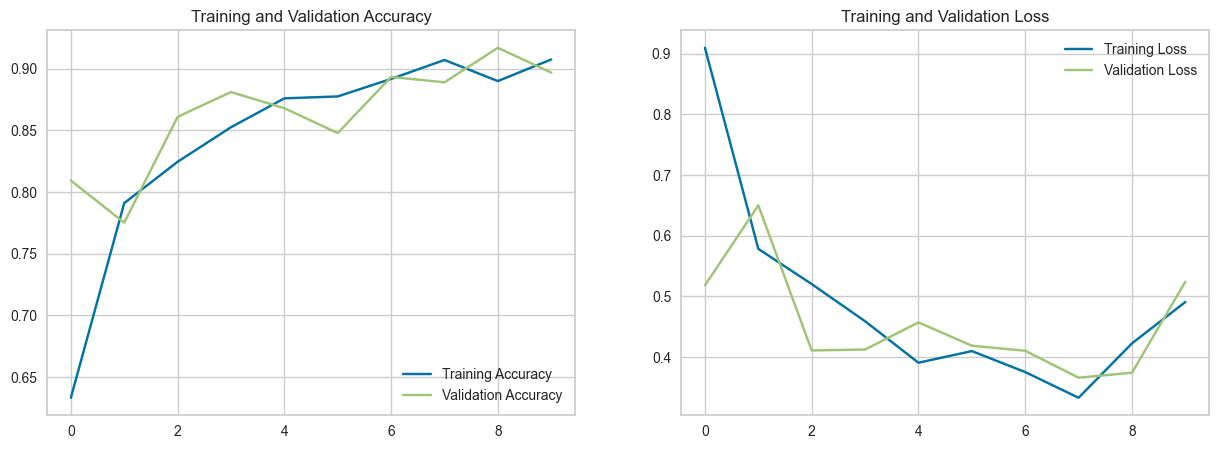

In [28]:
import matplotlib.pyplot as plt

# Plot the training history
def plot_training_history(history):
    """
    Plots the training and validation accuracy and loss.

    Parameters:
    history (History): A TensorFlow History object containing the training history.
    """
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

# Call the function to plot the training history
plot_training_history(history)


### Test Data Preprocessing

To evaluate our model on new, unseen data, we must preprocess our test images in the same way as our training images. This will ensure consistency and allow the model to make predictions on data formatted similarly to what it was trained on. We'll use the `preprocess_images` function defined earlier to process the test images.


In [30]:
test_dir = 'Testing'  # Replace with your actual test directory path
test_contents = ['glioma', 'meningioma', 'notumor', 'pituitary']  # Replace with your actual category names

# Preprocess the test images
test_images, test_labels = preprocess_images(test_dir, test_contents, img_size)

# Expand dimensions for Keras, since we're using grayscale images
test_images_expanded = np.expand_dims(test_images, axis=-1)

# Confirm the shape of the test images and labels arrays
test_images_expanded.shape, test_labels.shape


((1311, 128, 128, 1), (1311,))

### Evaluating the Model on Test Data

With our test data preprocessed, we can now evaluate the model's performance on it. This step will give us insight into how the model performs on data that it hasn't seen during training or validation, which is a good indicator of its ability to generalize.


In [31]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images_expanded, test_labels)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Generate predictions
y_pred_test = model.predict(test_images_expanded)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

# Generate a confusion matrix
conf_matrix_test = confusion_matrix(test_labels, y_pred_test_classes)
print(conf_matrix_test)

# Generate a classification report
class_report_test = classification_report(test_labels, y_pred_test_classes)
print(class_report_test)


41/41 [==============================] - 1s 12ms/step - loss: 0.5898 - accuracy: 0.8940
Test Loss: 0.5898205041885376
Test Accuracy: 0.8939740657806396
41/41 [==============================] - 0s 5ms/step
[[279  18   0   3]
 [ 53 212  28  13]
 [  7   5 392   1]
 [  2   9   0 289]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       300
           1       0.87      0.69      0.77       306
           2       0.93      0.97      0.95       405
           3       0.94      0.96      0.95       300

    accuracy                           0.89      1311
   macro avg       0.89      0.89      0.89      1311
weighted avg       0.89      0.89      0.89      1311


### Visualization of Model's Performance on Test Data

Visualizations are a powerful way to convey the performance of our model on the test data. A confusion matrix heatmap will help us see the true positives, false positives, false negatives, and true negatives in a color-coded format. Additionally, we'll visualize the precision, recall, and f1-score for each class using a bar chart, providing a clear picture of the model's strengths and weaknesses across different categories.


41/41 [==============================] - 0s 10ms/step


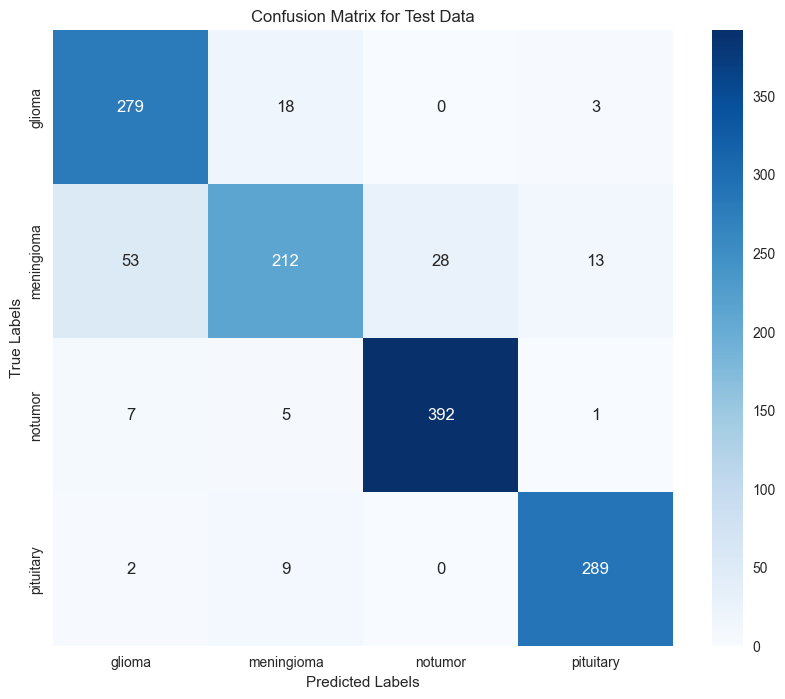

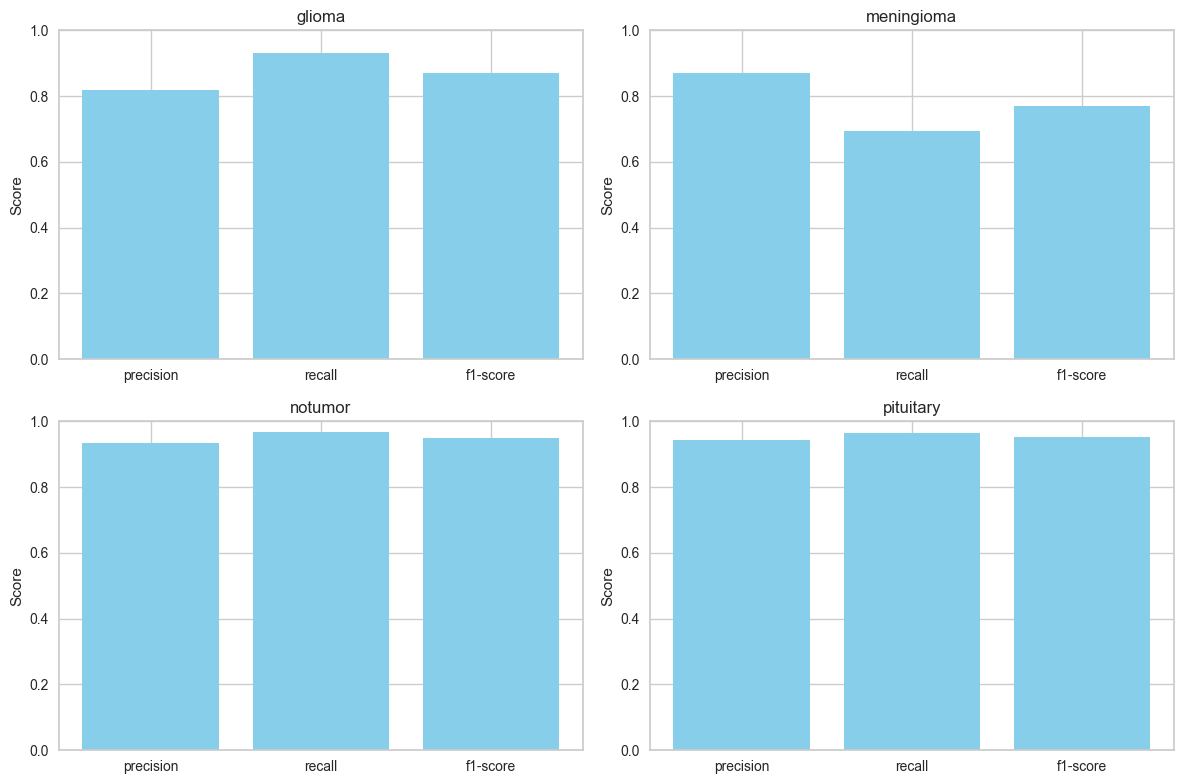

In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Generate predictions
y_pred_test = model.predict(test_images_expanded)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

# Generate a confusion matrix
conf_matrix_test = confusion_matrix(test_labels, y_pred_test_classes)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=test_contents, yticklabels=test_contents)
plt.title('Confusion Matrix for Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate a classification report
class_report_test = classification_report(test_labels, y_pred_test_classes, target_names=test_contents, output_dict=True)

# Visualize the classification report as a bar chart
plt.figure(figsize=(12, 8))
for i, (label, scores) in enumerate(class_report_test.items()):
    if label in ['accuracy', 'macro avg', 'weighted avg']:
        continue  # skip the averages
    plt.subplot(2, 2, i+1)
    measures = ['precision', 'recall', 'f1-score']
    scores_list = [scores[measure] for measure in measures]
    plt.bar(measures, scores_list, color='skyblue')
    plt.title(label)
    plt.ylim(0, 1)
    plt.ylabel('Score')
plt.tight_layout()
plt.show()
